## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49.1ms	remaining: 49.1s
1:	learn: 0.9301086	total: 51.3ms	remaining: 25.6s
2:	learn: 0.9005637	total: 53.4ms	remaining: 17.8s
3:	learn: 0.8720983	total: 55.6ms	remaining: 13.8s
4:	learn: 0.8467410	total: 58.7ms	remaining: 11.7s
5:	learn: 0.8226672	total: 60.9ms	remaining: 10.1s
6:	learn: 0.7994702	total: 63.2ms	remaining: 8.96s
7:	learn: 0.7784272	total: 65.5ms	remaining: 8.13s
8:	learn: 0.7602192	total: 67.8ms	remaining: 7.47s
9:	learn: 0.7412421	total: 70.1ms	remaining: 6.94s
10:	learn: 0.7247930	total: 72.4ms	remaining: 6.51s
11:	learn: 0.7089951	total: 74.4ms	remaining: 6.12s
12:	learn: 0.6951345	total: 76.3ms	remaining: 5.79s
13:	learn: 0.6809276	total: 78.3ms	remaining: 5.51s
14:	learn: 0.6692630	total: 80.3ms	remaining: 5.27s
15:	learn: 0.6588323	total: 82.2ms	remaining: 5.05s
16:	learn: 0.6472700	total: 84.1ms	remaining: 4.86s
17:	learn: 0.6379982	total: 86ms	remaining: 4.69s
18:	learn: 0.6294674	total: 87.9ms	remaining: 4.54s
19:	learn: 0.6193295	tot

81:	learn: 0.4620203	total: 212ms	remaining: 2.37s
82:	learn: 0.4608838	total: 214ms	remaining: 2.37s
83:	learn: 0.4604376	total: 216ms	remaining: 2.36s
84:	learn: 0.4596603	total: 218ms	remaining: 2.35s
85:	learn: 0.4587835	total: 220ms	remaining: 2.34s
86:	learn: 0.4583577	total: 222ms	remaining: 2.33s
87:	learn: 0.4577999	total: 224ms	remaining: 2.32s
88:	learn: 0.4572657	total: 226ms	remaining: 2.31s
89:	learn: 0.4569360	total: 228ms	remaining: 2.31s
90:	learn: 0.4559969	total: 230ms	remaining: 2.3s
91:	learn: 0.4549716	total: 232ms	remaining: 2.29s
92:	learn: 0.4544919	total: 234ms	remaining: 2.28s
93:	learn: 0.4537693	total: 236ms	remaining: 2.28s
94:	learn: 0.4532673	total: 238ms	remaining: 2.27s
95:	learn: 0.4526987	total: 240ms	remaining: 2.26s
96:	learn: 0.4520952	total: 242ms	remaining: 2.25s
97:	learn: 0.4513919	total: 244ms	remaining: 2.24s
98:	learn: 0.4503747	total: 246ms	remaining: 2.24s
99:	learn: 0.4494783	total: 248ms	remaining: 2.23s
100:	learn: 0.4487329	total: 250

165:	learn: 0.4180680	total: 378ms	remaining: 1.9s
166:	learn: 0.4176884	total: 380ms	remaining: 1.9s
167:	learn: 0.4173026	total: 382ms	remaining: 1.89s
168:	learn: 0.4170486	total: 384ms	remaining: 1.89s
169:	learn: 0.4165960	total: 386ms	remaining: 1.89s
170:	learn: 0.4161870	total: 388ms	remaining: 1.88s
171:	learn: 0.4156228	total: 390ms	remaining: 1.88s
172:	learn: 0.4153041	total: 392ms	remaining: 1.88s
173:	learn: 0.4148857	total: 394ms	remaining: 1.87s
174:	learn: 0.4144190	total: 396ms	remaining: 1.87s
175:	learn: 0.4140875	total: 398ms	remaining: 1.86s
176:	learn: 0.4136755	total: 400ms	remaining: 1.86s
177:	learn: 0.4133860	total: 402ms	remaining: 1.86s
178:	learn: 0.4129780	total: 404ms	remaining: 1.85s
179:	learn: 0.4122907	total: 406ms	remaining: 1.85s
180:	learn: 0.4119188	total: 408ms	remaining: 1.85s
181:	learn: 0.4115412	total: 410ms	remaining: 1.84s
182:	learn: 0.4112620	total: 412ms	remaining: 1.84s
183:	learn: 0.4107734	total: 414ms	remaining: 1.84s
184:	learn: 0.

249:	learn: 0.3912759	total: 544ms	remaining: 1.63s
250:	learn: 0.3908375	total: 546ms	remaining: 1.63s
251:	learn: 0.3904815	total: 548ms	remaining: 1.63s
252:	learn: 0.3902127	total: 551ms	remaining: 1.63s
253:	learn: 0.3900274	total: 553ms	remaining: 1.62s
254:	learn: 0.3898171	total: 555ms	remaining: 1.62s
255:	learn: 0.3896180	total: 557ms	remaining: 1.62s
256:	learn: 0.3894251	total: 558ms	remaining: 1.61s
257:	learn: 0.3892139	total: 561ms	remaining: 1.61s
258:	learn: 0.3889352	total: 563ms	remaining: 1.61s
259:	learn: 0.3886531	total: 565ms	remaining: 1.61s
260:	learn: 0.3884539	total: 567ms	remaining: 1.6s
261:	learn: 0.3882459	total: 569ms	remaining: 1.6s
262:	learn: 0.3881101	total: 571ms	remaining: 1.6s
263:	learn: 0.3879324	total: 573ms	remaining: 1.6s
264:	learn: 0.3876861	total: 575ms	remaining: 1.59s
265:	learn: 0.3874255	total: 577ms	remaining: 1.59s
266:	learn: 0.3868515	total: 579ms	remaining: 1.59s
267:	learn: 0.3866114	total: 581ms	remaining: 1.59s
268:	learn: 0.38

330:	learn: 0.3738646	total: 707ms	remaining: 1.43s
331:	learn: 0.3736647	total: 709ms	remaining: 1.43s
332:	learn: 0.3733429	total: 711ms	remaining: 1.42s
333:	learn: 0.3732059	total: 713ms	remaining: 1.42s
334:	learn: 0.3730574	total: 715ms	remaining: 1.42s
335:	learn: 0.3728663	total: 717ms	remaining: 1.42s
336:	learn: 0.3727111	total: 719ms	remaining: 1.41s
337:	learn: 0.3724765	total: 721ms	remaining: 1.41s
338:	learn: 0.3722959	total: 723ms	remaining: 1.41s
339:	learn: 0.3720213	total: 725ms	remaining: 1.41s
340:	learn: 0.3718316	total: 727ms	remaining: 1.4s
341:	learn: 0.3716519	total: 729ms	remaining: 1.4s
342:	learn: 0.3714592	total: 731ms	remaining: 1.4s
343:	learn: 0.3713389	total: 733ms	remaining: 1.4s
344:	learn: 0.3711642	total: 735ms	remaining: 1.4s
345:	learn: 0.3709569	total: 737ms	remaining: 1.39s
346:	learn: 0.3708184	total: 739ms	remaining: 1.39s
347:	learn: 0.3705958	total: 741ms	remaining: 1.39s
348:	learn: 0.3703798	total: 743ms	remaining: 1.39s
349:	learn: 0.370

414:	learn: 0.3597887	total: 875ms	remaining: 1.23s
415:	learn: 0.3595791	total: 877ms	remaining: 1.23s
416:	learn: 0.3594487	total: 879ms	remaining: 1.23s
417:	learn: 0.3592759	total: 881ms	remaining: 1.23s
418:	learn: 0.3591088	total: 883ms	remaining: 1.22s
419:	learn: 0.3589470	total: 885ms	remaining: 1.22s
420:	learn: 0.3587972	total: 887ms	remaining: 1.22s
421:	learn: 0.3586831	total: 889ms	remaining: 1.22s
422:	learn: 0.3585620	total: 892ms	remaining: 1.22s
423:	learn: 0.3584427	total: 894ms	remaining: 1.21s
424:	learn: 0.3583044	total: 896ms	remaining: 1.21s
425:	learn: 0.3581698	total: 898ms	remaining: 1.21s
426:	learn: 0.3580461	total: 900ms	remaining: 1.21s
427:	learn: 0.3579182	total: 903ms	remaining: 1.21s
428:	learn: 0.3577521	total: 905ms	remaining: 1.2s
429:	learn: 0.3576138	total: 906ms	remaining: 1.2s
430:	learn: 0.3575528	total: 908ms	remaining: 1.2s
431:	learn: 0.3574686	total: 910ms	remaining: 1.2s
432:	learn: 0.3572923	total: 912ms	remaining: 1.19s
433:	learn: 0.35

497:	learn: 0.3481630	total: 1.04s	remaining: 1.05s
498:	learn: 0.3480855	total: 1.04s	remaining: 1.05s
499:	learn: 0.3478655	total: 1.05s	remaining: 1.05s
500:	learn: 0.3477966	total: 1.05s	remaining: 1.04s
501:	learn: 0.3476142	total: 1.05s	remaining: 1.04s
502:	learn: 0.3474667	total: 1.05s	remaining: 1.04s
503:	learn: 0.3473844	total: 1.05s	remaining: 1.04s
504:	learn: 0.3471852	total: 1.06s	remaining: 1.03s
505:	learn: 0.3471124	total: 1.06s	remaining: 1.03s
506:	learn: 0.3469987	total: 1.06s	remaining: 1.03s
507:	learn: 0.3469000	total: 1.06s	remaining: 1.03s
508:	learn: 0.3467621	total: 1.06s	remaining: 1.03s
509:	learn: 0.3466653	total: 1.07s	remaining: 1.02s
510:	learn: 0.3465795	total: 1.07s	remaining: 1.02s
511:	learn: 0.3464899	total: 1.07s	remaining: 1.02s
512:	learn: 0.3463711	total: 1.07s	remaining: 1.02s
513:	learn: 0.3462483	total: 1.07s	remaining: 1.01s
514:	learn: 0.3460733	total: 1.08s	remaining: 1.01s
515:	learn: 0.3459427	total: 1.08s	remaining: 1.01s
516:	learn: 

580:	learn: 0.3382469	total: 1.21s	remaining: 872ms
581:	learn: 0.3381645	total: 1.21s	remaining: 870ms
582:	learn: 0.3380538	total: 1.21s	remaining: 867ms
583:	learn: 0.3379690	total: 1.21s	remaining: 865ms
584:	learn: 0.3378924	total: 1.22s	remaining: 863ms
585:	learn: 0.3378307	total: 1.22s	remaining: 861ms
586:	learn: 0.3377186	total: 1.22s	remaining: 859ms
587:	learn: 0.3376434	total: 1.22s	remaining: 857ms
588:	learn: 0.3375696	total: 1.22s	remaining: 854ms
589:	learn: 0.3374902	total: 1.23s	remaining: 852ms
590:	learn: 0.3373056	total: 1.23s	remaining: 850ms
591:	learn: 0.3371913	total: 1.23s	remaining: 848ms
592:	learn: 0.3371272	total: 1.23s	remaining: 846ms
593:	learn: 0.3370368	total: 1.23s	remaining: 844ms
594:	learn: 0.3368150	total: 1.24s	remaining: 841ms
595:	learn: 0.3367491	total: 1.24s	remaining: 839ms
596:	learn: 0.3366496	total: 1.24s	remaining: 837ms
597:	learn: 0.3365561	total: 1.24s	remaining: 835ms
598:	learn: 0.3364801	total: 1.24s	remaining: 833ms
599:	learn: 

662:	learn: 0.3299184	total: 1.38s	remaining: 699ms
663:	learn: 0.3298189	total: 1.38s	remaining: 697ms
664:	learn: 0.3296970	total: 1.38s	remaining: 695ms
665:	learn: 0.3296671	total: 1.38s	remaining: 693ms
666:	learn: 0.3295999	total: 1.38s	remaining: 691ms
667:	learn: 0.3295390	total: 1.39s	remaining: 689ms
668:	learn: 0.3294195	total: 1.39s	remaining: 687ms
669:	learn: 0.3293185	total: 1.39s	remaining: 685ms
670:	learn: 0.3292086	total: 1.39s	remaining: 683ms
671:	learn: 0.3289913	total: 1.39s	remaining: 681ms
672:	learn: 0.3288859	total: 1.4s	remaining: 679ms
673:	learn: 0.3288145	total: 1.4s	remaining: 676ms
674:	learn: 0.3286969	total: 1.4s	remaining: 674ms
675:	learn: 0.3286108	total: 1.4s	remaining: 672ms
676:	learn: 0.3285218	total: 1.4s	remaining: 670ms
677:	learn: 0.3284620	total: 1.41s	remaining: 668ms
678:	learn: 0.3283999	total: 1.41s	remaining: 666ms
679:	learn: 0.3283506	total: 1.41s	remaining: 664ms
680:	learn: 0.3282208	total: 1.41s	remaining: 662ms
681:	learn: 0.328

741:	learn: 0.3227984	total: 1.54s	remaining: 534ms
742:	learn: 0.3226895	total: 1.54s	remaining: 532ms
743:	learn: 0.3225924	total: 1.54s	remaining: 530ms
744:	learn: 0.3225096	total: 1.54s	remaining: 528ms
745:	learn: 0.3224088	total: 1.54s	remaining: 526ms
746:	learn: 0.3223202	total: 1.55s	remaining: 524ms
747:	learn: 0.3222404	total: 1.55s	remaining: 522ms
748:	learn: 0.3221810	total: 1.55s	remaining: 519ms
749:	learn: 0.3221342	total: 1.55s	remaining: 517ms
750:	learn: 0.3220746	total: 1.55s	remaining: 515ms
751:	learn: 0.3219897	total: 1.56s	remaining: 513ms
752:	learn: 0.3218990	total: 1.56s	remaining: 511ms
753:	learn: 0.3218179	total: 1.56s	remaining: 509ms
754:	learn: 0.3217323	total: 1.56s	remaining: 507ms
755:	learn: 0.3216617	total: 1.56s	remaining: 505ms
756:	learn: 0.3216090	total: 1.57s	remaining: 503ms
757:	learn: 0.3215306	total: 1.57s	remaining: 501ms
758:	learn: 0.3214274	total: 1.57s	remaining: 499ms
759:	learn: 0.3212014	total: 1.57s	remaining: 496ms
760:	learn: 

822:	learn: 0.3158160	total: 1.7s	remaining: 366ms
823:	learn: 0.3157523	total: 1.7s	remaining: 364ms
824:	learn: 0.3156673	total: 1.71s	remaining: 362ms
825:	learn: 0.3156288	total: 1.71s	remaining: 360ms
826:	learn: 0.3155257	total: 1.71s	remaining: 358ms
827:	learn: 0.3154546	total: 1.71s	remaining: 356ms
828:	learn: 0.3153664	total: 1.71s	remaining: 354ms
829:	learn: 0.3152896	total: 1.72s	remaining: 351ms
830:	learn: 0.3152050	total: 1.72s	remaining: 349ms
831:	learn: 0.3151385	total: 1.72s	remaining: 347ms
832:	learn: 0.3150922	total: 1.72s	remaining: 345ms
833:	learn: 0.3149588	total: 1.72s	remaining: 343ms
834:	learn: 0.3149074	total: 1.73s	remaining: 341ms
835:	learn: 0.3148291	total: 1.73s	remaining: 339ms
836:	learn: 0.3147707	total: 1.73s	remaining: 337ms
837:	learn: 0.3147022	total: 1.73s	remaining: 335ms
838:	learn: 0.3145737	total: 1.74s	remaining: 333ms
839:	learn: 0.3144908	total: 1.74s	remaining: 331ms
840:	learn: 0.3144038	total: 1.74s	remaining: 329ms
841:	learn: 0.

904:	learn: 0.3097402	total: 1.87s	remaining: 196ms
905:	learn: 0.3096378	total: 1.87s	remaining: 194ms
906:	learn: 0.3095878	total: 1.87s	remaining: 192ms
907:	learn: 0.3095154	total: 1.87s	remaining: 190ms
908:	learn: 0.3094688	total: 1.88s	remaining: 188ms
909:	learn: 0.3093784	total: 1.88s	remaining: 186ms
910:	learn: 0.3093058	total: 1.88s	remaining: 184ms
911:	learn: 0.3092574	total: 1.88s	remaining: 182ms
912:	learn: 0.3092023	total: 1.88s	remaining: 180ms
913:	learn: 0.3091306	total: 1.89s	remaining: 178ms
914:	learn: 0.3090719	total: 1.89s	remaining: 175ms
915:	learn: 0.3090199	total: 1.89s	remaining: 173ms
916:	learn: 0.3089417	total: 1.89s	remaining: 171ms
917:	learn: 0.3088562	total: 1.89s	remaining: 169ms
918:	learn: 0.3087578	total: 1.9s	remaining: 167ms
919:	learn: 0.3086793	total: 1.9s	remaining: 165ms
920:	learn: 0.3086255	total: 1.9s	remaining: 163ms
921:	learn: 0.3085073	total: 1.9s	remaining: 161ms
922:	learn: 0.3084388	total: 1.91s	remaining: 159ms
923:	learn: 0.30

984:	learn: 0.3040237	total: 2.03s	remaining: 31ms
985:	learn: 0.3039532	total: 2.04s	remaining: 28.9ms
986:	learn: 0.3038723	total: 2.04s	remaining: 26.8ms
987:	learn: 0.3038141	total: 2.04s	remaining: 24.8ms
988:	learn: 0.3037455	total: 2.04s	remaining: 22.7ms
989:	learn: 0.3036820	total: 2.04s	remaining: 20.6ms
990:	learn: 0.3036165	total: 2.04s	remaining: 18.6ms
991:	learn: 0.3035759	total: 2.05s	remaining: 16.5ms
992:	learn: 0.3035124	total: 2.05s	remaining: 14.4ms
993:	learn: 0.3034295	total: 2.05s	remaining: 12.4ms
994:	learn: 0.3033612	total: 2.05s	remaining: 10.3ms
995:	learn: 0.3033209	total: 2.06s	remaining: 8.25ms
996:	learn: 0.3032659	total: 2.06s	remaining: 6.19ms
997:	learn: 0.3032189	total: 2.06s	remaining: 4.13ms
998:	learn: 0.3031594	total: 2.06s	remaining: 2.06ms
999:	learn: 0.3030916	total: 2.06s	remaining: 0us


# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
686273623.0113704


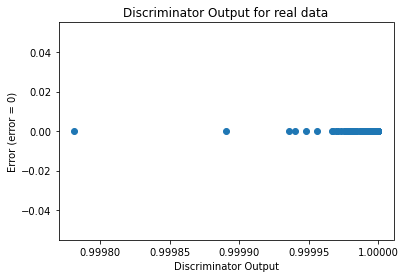

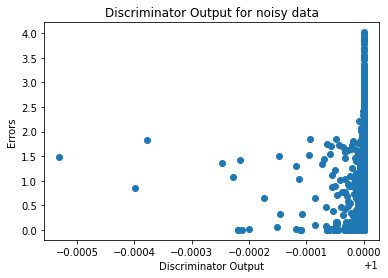

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6000]], device='cuda:0', requires_grad=True)
